# **Practica 6 - Heart Disease**

Author: Cruz Rangel Leonardo Said

What is heart disease?\
El término 'heart disease' o 'enfermedad del corazón' en español, se refiere a varios tipos de condiciones del corazón. El tipo más común de enfermedad del corazón en los Estados Unidos es la enfermedad de las arterias coronarias (EAC), que afecta el flujo sanguíneao hacia el corazón. La disminución del flujo sanguíneo puede causar un ataque cardíaco.

What are the symptoms of heart disease?\
La enfermedad del corazón puede ser 'silenciosa' en ciertas ocasiones y los médicos no son capaces de diagnosticarlo hasta que una persona presenta signos o sítomas de un ataque cardíaco, insuficiencia cardíaca o arritmiaa. Cuando ocurren estos eventos, los síntomas pueden incluir:

- Ataques del corazón: dolor o molestias en el pecho, dolor en la parte superior de la espalda o el cuello, indigestión, acidez estomacal, náuseas o vómitos, fatiga externa molestias en la parte superior del cuerpo, mareo y falta de aire.

- Arritmia: sensación de latidos irregulares en el pecho (palpitaciones)

- Insuficiencia cardíaca: falta de aire, fatiga o hinchazón de los pies, tobillos, piernas, abdomen o venas del cuello.

Facts:
Alrededor de 697,000 personas en los Estados Unidos murieron por enfermedades del corazón en el 2020, lo que equivale a 1 de cada 5 muertes.

¿Cuáles son los factores de riesgo para la enfermedad del corazón?

La presión arterial alta, el colesterol alto en la sangre y el tabaquismo son factores de riesgo clave para la enfermedad del corazón. Alrededor de la mitad de las personas en los Estados Unidos (47%) tienen al menos uno de estos tres factores de riesgo. Varios otros padecimientos médicos y elecciones de estilo de vida también pueden aumentar el riesgo de enfermedad del corazón, incluyendo:
- Diabetes
- Sobrepeso y obesidad
- Mala alimentación

El siguiente análisis exploratorio de datos busca encontrar información de interés que pueda ser útil para predecir si un paciente presenta problemas del corazón dependiendo de sus condiciones de salud actuales.

## Diccionario de datos

- Gender - género
- age - edad
- eduation - nivel de educación
- currentSmoker - valor binario que indica si una persona fuma o no
- cigsPerDay - cigarrillos por día que fuma una persona
- cBPMeds - valor binario que indica si una persona está tomando medicamentos para la presión arterial.
- prevalentStroke - valor binario que indica si una persona ha tenido un accidente cardiovascular previo.
- prevalentHyp - valor binario que indica si una persona tiene hipertensión arterial
- diabetes - valor binario que indica si una persona tiene diabetes
- totChol - el nivel total de colesterol en la sangre de una persona
- sysBP - la presión arterial sistólica de una persona
- diaBP - la presión arterial diastólica de una persona
- BMI - el índice de masa corporal de una persona
- heartRate - la frecuencia cardíaca de una persona en reposo
- glucose - nivel de glucosa en sangre de una persona
- Heart_stroke - un valor binario que indica si una persona ha sufrido una enfermedad cardíaca o un accidente cerebrovascular.

# **I. Análisis Exploratorio de Datos**

## Importar bibliotecas y datos

In [348]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno

In [349]:
HeartDisease = pd.read_csv("Datos/heart_disease.csv") #Lee el dataset. Añade la extensión del archivo.
HeartDisease #Retorna el dataset.

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


## Paso 1 - Descripción de la estructura de datos:

1. Dimensiones del Data Frame

In [350]:
HeartDisease.shape

(4238, 16)

2. Tipos de datos

In [351]:
HeartDisease.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

## Paso 2 - Identificación de datos faltantes

In [352]:
HeartDisease.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [353]:
HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


Se identifican datos faltantes en las variables **education**, **cigsPerDay**, **BPMeds**, **totChol**, **BMI**, **heartRate**, **glucose**. No son muchos los datos faltantes en comparación con el número total de los mismos, por lo cual se ha tomado la decisión de eliminarlos.

## Paso 3 - Detección de valores atípicos

1. Histogramas

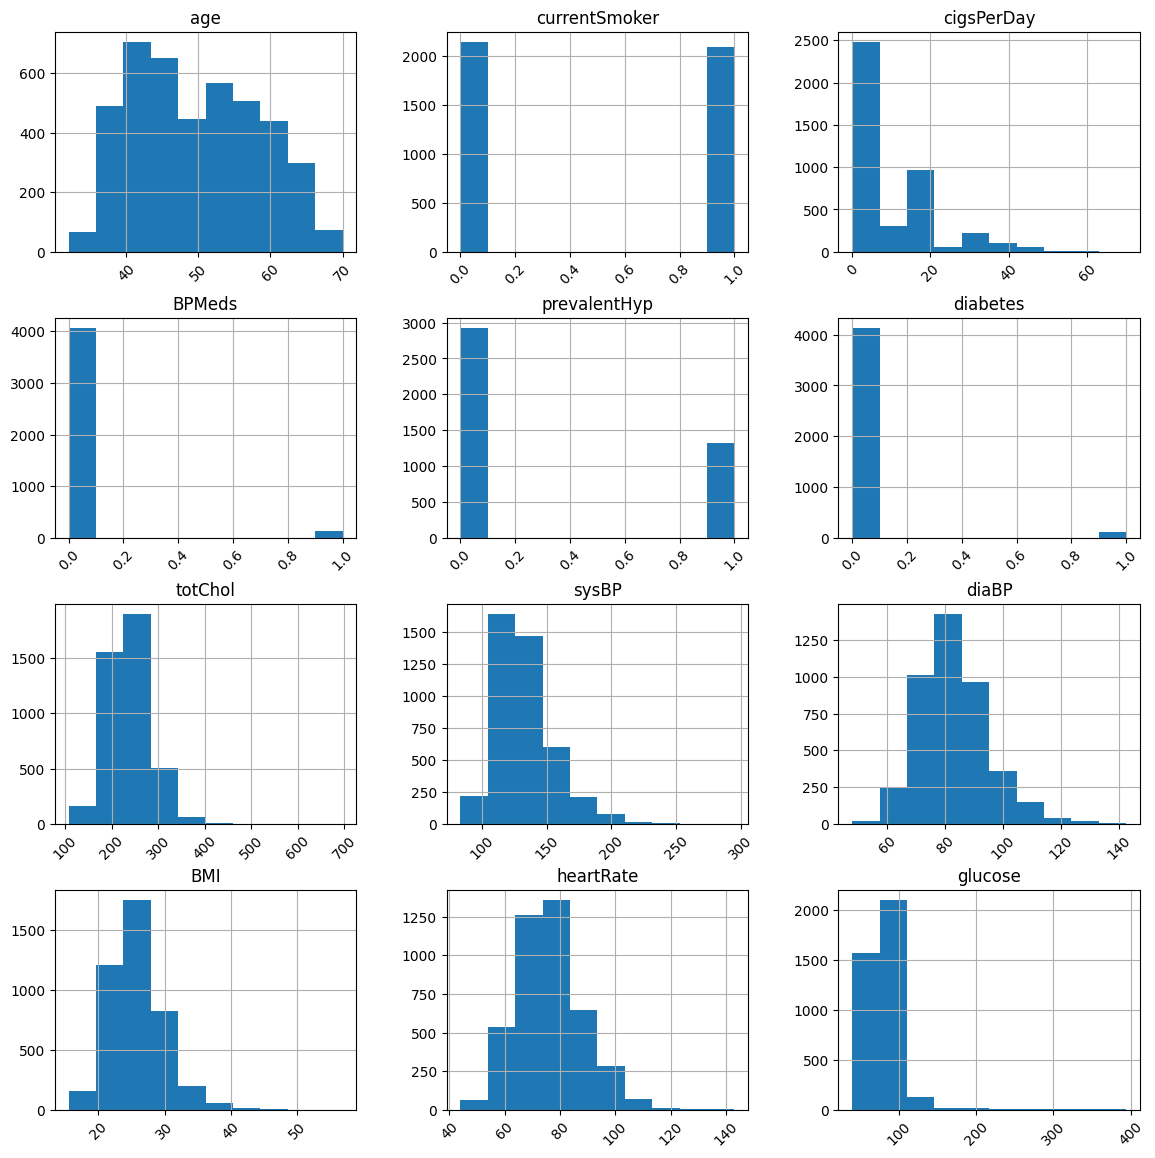

In [354]:
HeartDisease.hist(figsize=(14,14), xrot=45)
plt.show()

2. Resumen estadístico

In [355]:
HeartDisease.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


3. Diagramas de caja

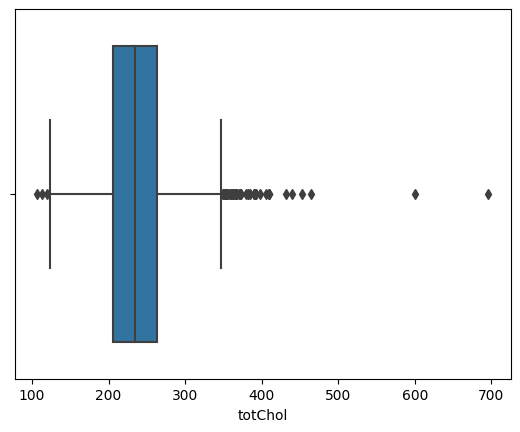

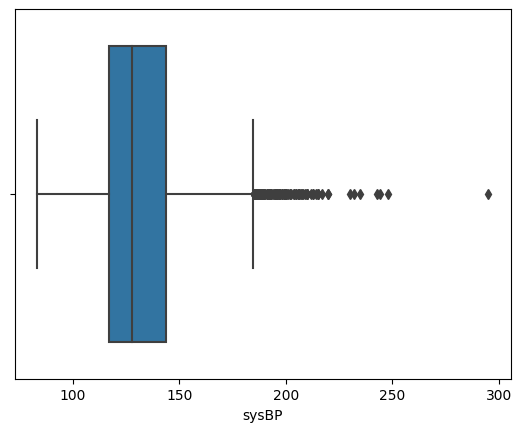

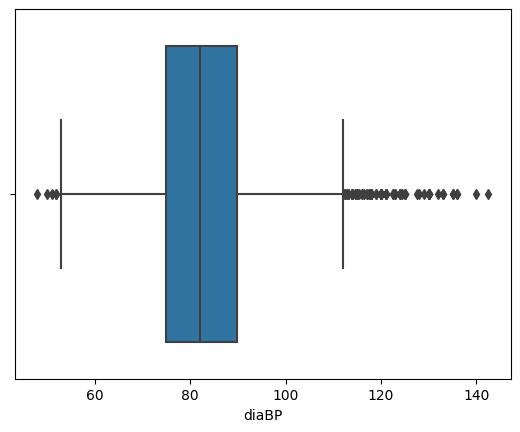

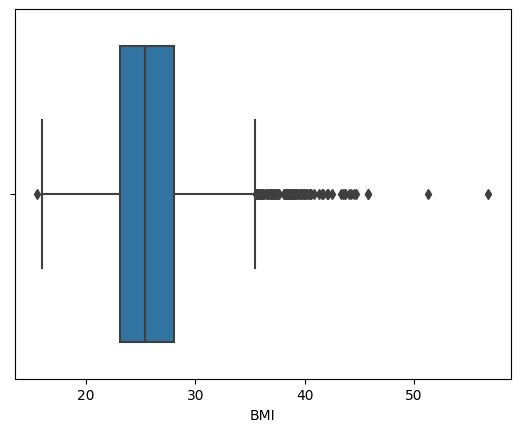

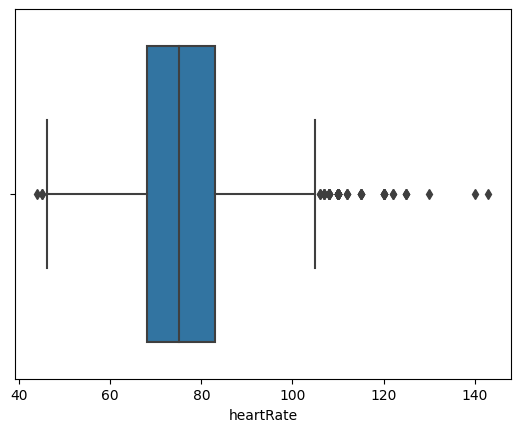

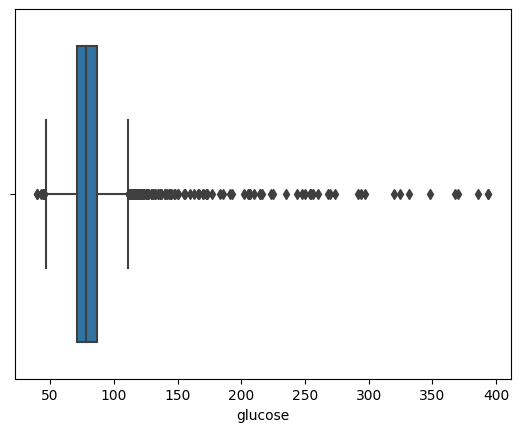

In [356]:
VariablesValoresAtipicos = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for col in VariablesValoresAtipicos:
  sns.boxplot(x=HeartDisease[col])
  plt.show()

De los diagramas de caja se puede verificar que existen medidas en las variables **totChol**, **sysBP**, **diaBP**, **BMI**, **heartRate** y **glucose** que parecen ser demasiado altas y se salen mucho de un rango normal.

Por ejemplo, el rango de los niveles de colesterol total en la sangre para adultos sanos está entre 125 y 200 mg/dL. Los niveles por encima de 240 mg/dL ya se consideran altos y la medida máxima en totChol es de 696 por lo que muy probablemente sea un valor atípico.

En sysBP, el valor normal en adultos es menor a 120 mmHg, una presión sistólica de más de 130 se considera alta (hipertensión). Un valor de 295 podría indicar una hipertensión severa y potencialmente peligrosa para la salud.

En diaBP elvalor normal de la presión diastólica es menor a 80 mmHg, una presión dastólica de más de 90 se considera alta. Un valor de 142.5 podría indicar una hipertención severa.

En BMI (Indice de masa corporal) el rango en personas con obesidad va de 30 a 39.9, por lo que un valor de 56.8 pudiera ser erróneo o un valor atípico muy alto.

En heartRate el rango normal en reposo generalmente está entre 60 y 100 latidos, un valor de 143 es inusualmente alto.

En glucose, el rango normal de glucemia en ayunas es generalmente de 70 a 100 mg/dL, un valor por encima de 200 mg/dL sugiere diabetes.

Todos estos valores inusualmente altos no necesariamente deberían ser eliminados de la base de atos, pues pudieran ser indicativos de una condición médica o siuación particular, se tendría que consular con un profesional de la salud para que determine si son correctos o no.

Para efectos de este trabajo, solo se van a eliminar aquellos que no tengan mucho sentido y que se separan mucho del rango promedio, los demás se consideraran como únicos.

4. Distribución de variables categóricas

In [357]:
HeartDisease.describe(include='object')

,Gender,education,prevalentStroke,Heart_ stroke
count,4238,4133,4238,4238
unique,2,4,2,2
top,Female,uneducated,no,No
freq,2419,1720,4213,3594


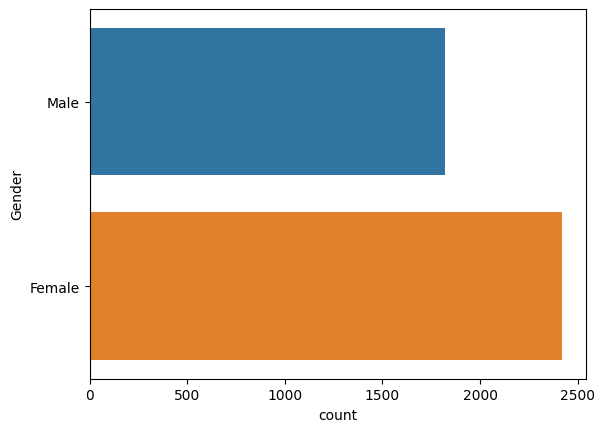

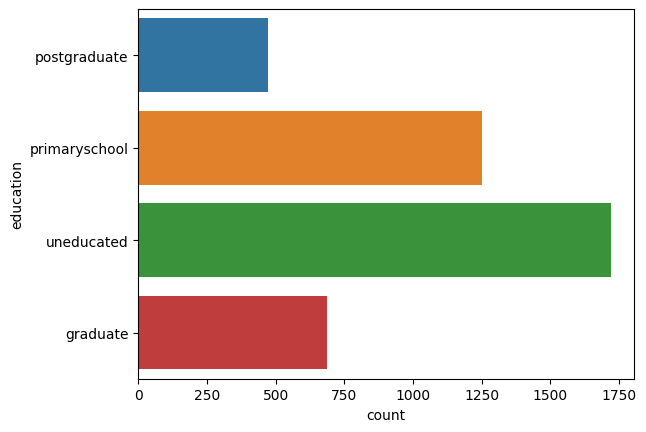

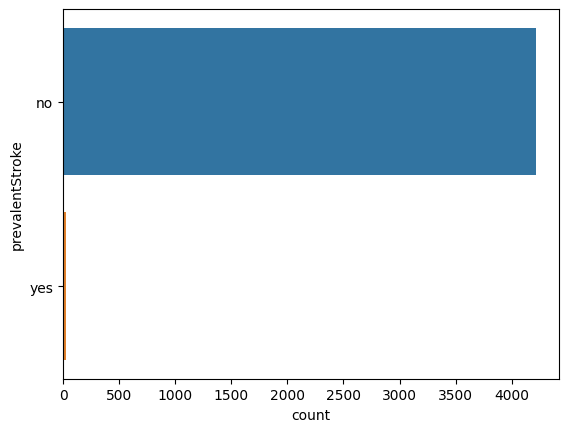

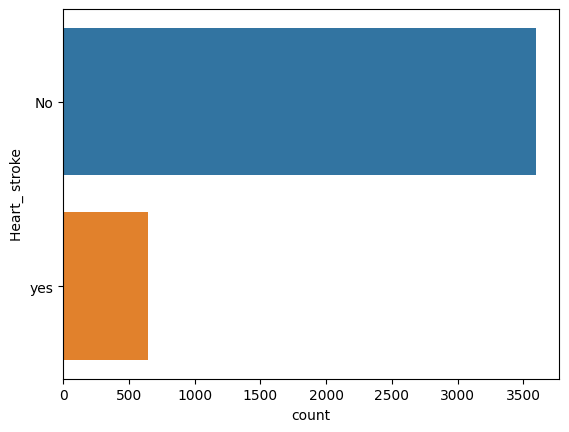

In [358]:
for col in HeartDisease.select_dtypes(include='object'):
  if HeartDisease[col].nunique()<10:sns.countplot(y=col, data=HeartDisease)
  plt.show()

## Paso 4 - Identificación de relaciones entre pares de variables

In [359]:
HeartDisease.corr()

C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1565473766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HeartDisease.corr()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.213748,-0.192791,0.122995,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256
currentSmoker,-0.213748,1.000000,0.769690,-0.048938,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826
cigsPerDay,-0.192791,0.769690,1.000000,-0.046134,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960
BPMeds,0.122995,-0.048938,-0.046134,1.000000,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176
prevalentHyp,0.307194,-0.103260,-0.066146,0.261187,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834
diabetes,0.101258,-0.044295,-0.037067,0.052047,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627
totChol,0.262131,-0.046562,-0.026320,0.080558,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408
sysBP,0.394302,-0.130230,-0.088780,0.254219,0.696755,0.111283,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621
diaBP,0.206104,-0.107746,-0.056632,0.194227,0.615751,0.050329,0.165182,0.784002,1.000000,0.377588,0.181255,0.061231
BMI,0.135800,-0.167650,-0.092856,0.100668,0.301318,0.087036,0.115767,0.326981,0.377588,1.000000,0.067678,0.087377


C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1578289024.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HeartDisease.corr(), cmap='RdBu_r', annot=True)


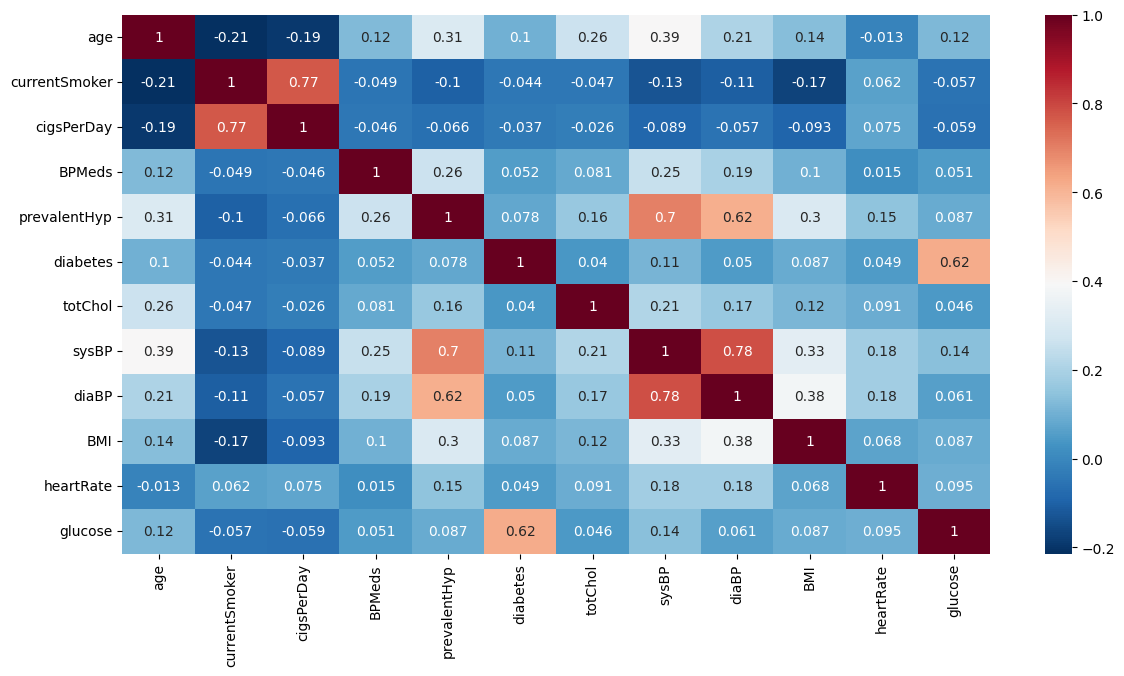

In [360]:
# Representa la correlación entre variables en forma de heatmap.
plt.figure(figsize=(14,7))
sns.heatmap(HeartDisease.corr(), cmap='RdBu_r', annot=True)
plt.show()

C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1486454723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MatrizInf = np.triu(HeartDisease.corr())
C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1486454723.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HeartDisease.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)


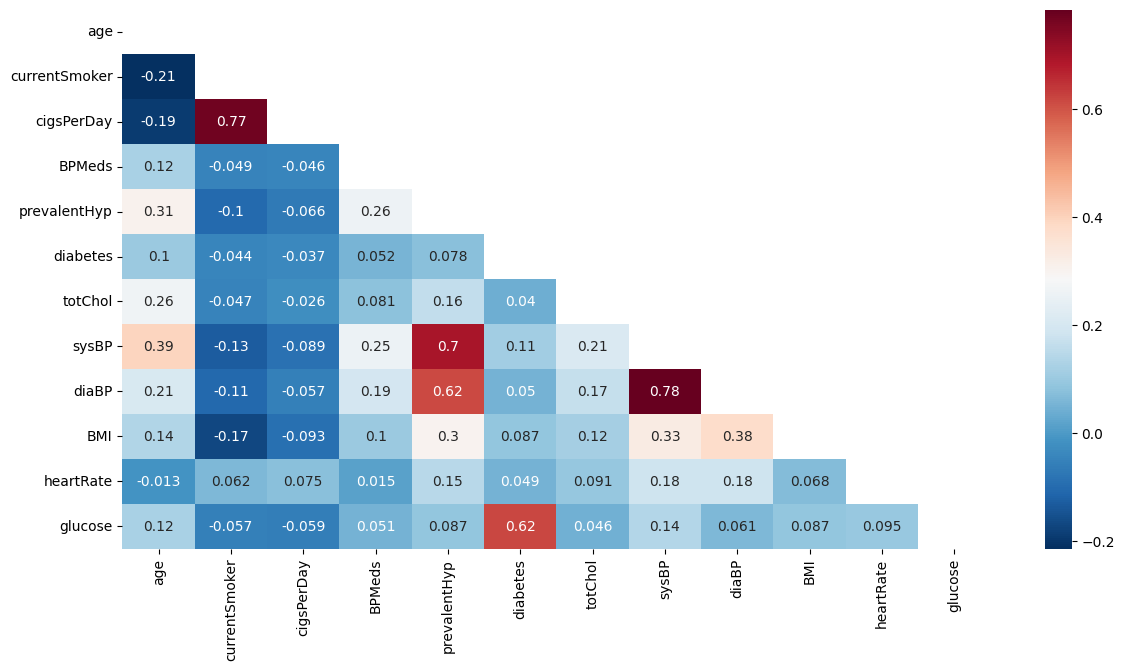

In [361]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(HeartDisease.corr())
sns.heatmap(HeartDisease.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

Del HeatMap se pueden identificar 5 correlaciones fuertes entre pares de variables: currentSmoker con cigsPerDay, prevalentHyp con diaBP y sysBP, diabetes con glucose y, finalmente entre sysBP con diaBP.

currentSmoker y cigsPerDay (0.77): tiene sentido porque los fumadores tienden a consumir más cigarrillos.

prevalentHyp con diaBP (0.62) y con sysBP(0.7): esto es esperable porque la hipertensión es una de las causas de aumento de la hipertensión arterial.

diabetes con glucose (0.62): la diabetes se caracteriza por el aumento de los niveles de glucemia, por lo que tiene sentido.

sysBP con diaBP (0.78): la presión arterial sistólica y diastólica son medidas relacionadas de la presión arterial, por lo tanto es normal que esten relacionadas.

## Paso 5 - Preparación de los datos

In [362]:
# Eliminación de datos faltantes
HeartDisease = HeartDisease.dropna(subset=['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate'], how='any')
HeartDisease.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [363]:
# Eliminación de valores atípicos
HeartDisease = HeartDisease.loc[HeartDisease['totChol'] <= 410.0] # 464
HeartDisease = HeartDisease.loc[HeartDisease['sysBP'] <= 220.0] # 220
HeartDisease = HeartDisease.loc[HeartDisease['diaBP'] <= 135.0] # 135
HeartDisease = HeartDisease.loc[HeartDisease['BMI'] <= 45.800] # 45.800
HeartDisease = HeartDisease.loc[HeartDisease['heartRate'] <= 108.0] #108
HeartDisease = HeartDisease.loc[HeartDisease['glucose'] <= 216.0]

HeartDisease.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000
mean,49.515551,0.490614,9.039227,0.028019,0.304847,0.019894,236.472681,131.806388,82.681423,25.726921,75.116839,80.362006
std,8.558251,0.499982,11.915958,0.165050,0.460407,0.139654,43.023724,21.272760,11.680050,3.928344,11.069824,16.077624
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,67.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.360000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.000000,27.970000,82.000000,86.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,410.000000,220.000000,135.000000,45.800000,108.000000,216.000000


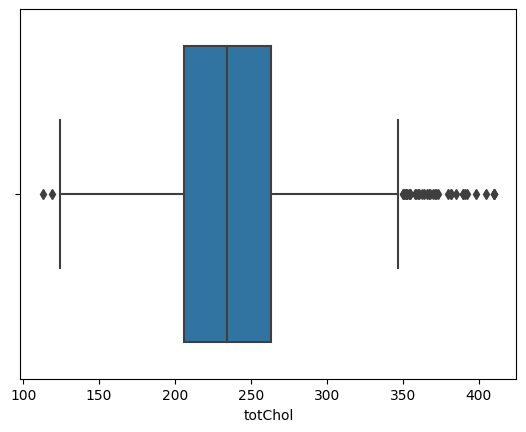

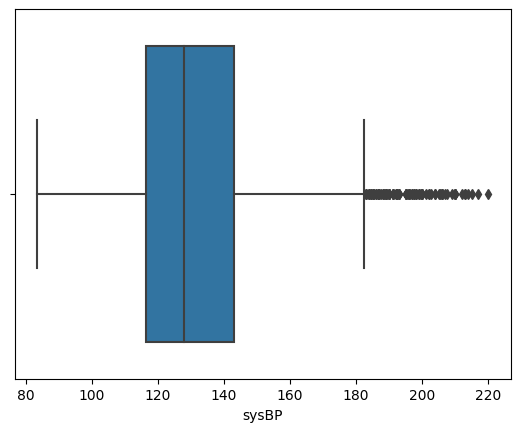

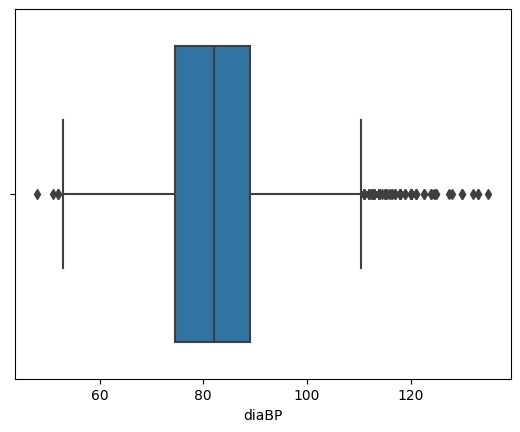

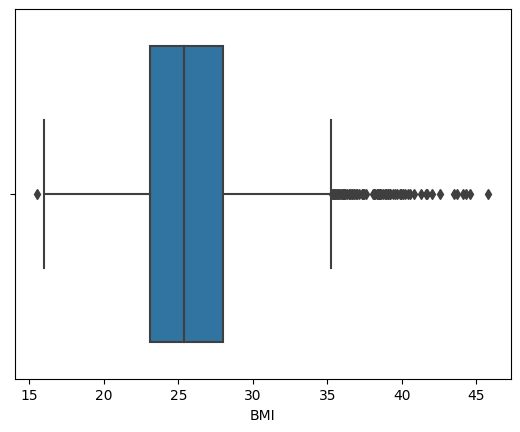

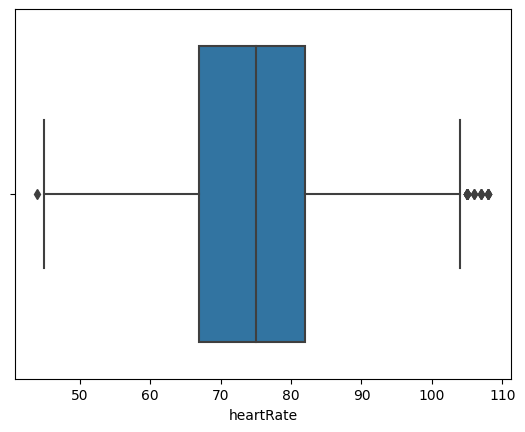

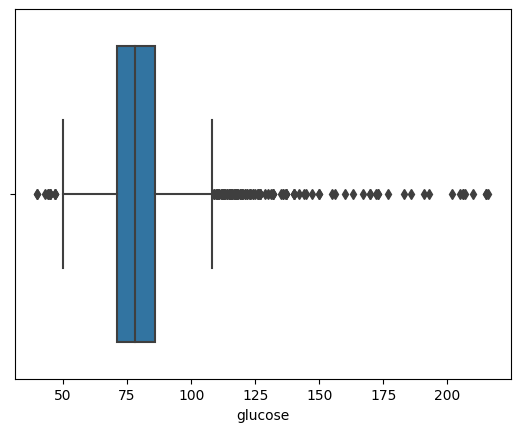

In [364]:
VariablesValoresAtipicos = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for col in VariablesValoresAtipicos:
  sns.boxplot(x=HeartDisease[col])
  plt.show()

Realizar este análisis exploratorio de datos sin la ayuda de un profesional de la salud fue un desafío, especialmente al momento de establecer un umbral máximo para todas las medidas. Se buscó eliminar los valores extremos que se alejaban significativamente del rango típico, especificamente los que inflaban los resultados para la media de los datos. Además, se trató de conservar los valores que fueran representativos. Sin embargo, la falta de información sobre si los datos provienen de pacientes con diabetes u otra información que fuera de utilidad dificultó la toma de decisiones para considerar o descartar ciertos datos. En definitiva, se seleccionaron las medidas con cuidado, aunque sin la certeza absoluta de su relevancia médica.

Para los propósitos de la práctica, se considera que la depuración es adecuada, sin embargo, en un caso de uso real resultaría necesario consultar con profesionales de la salud si aquellos registros con valores extremos corresponden a la realidad y se ajustan a las necesidades del proyecto realizado y es necesario conservarlos para evitar un posible sesgo en los resultados.

## **II. Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

## Paso 1: Evidencia de posibles variables correlacionadas


In [365]:
HeartDisease.corr()

C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1565473766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HeartDisease.corr()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.207353,-0.187169,0.122113,0.304866,0.093892,0.275640,0.388269,0.206926,0.131951,-0.006405,0.113933
currentSmoker,-0.207353,1.000000,0.773067,-0.054549,-0.106884,-0.031443,-0.052542,-0.129818,-0.107968,-0.160765,0.054457,-0.057664
cigsPerDay,-0.187169,0.773067,1.000000,-0.049153,-0.071811,-0.033816,-0.029681,-0.089784,-0.050502,-0.081645,0.066049,-0.065159
BPMeds,0.122113,-0.054549,-0.049153,1.000000,0.256387,0.036607,0.079084,0.251795,0.186869,0.096930,-0.012070,0.010435
prevalentHyp,0.304866,-0.106884,-0.071811,0.256387,1.000000,0.062576,0.163388,0.699408,0.617683,0.297459,0.134612,0.078722
diabetes,0.093892,-0.031443,-0.033816,0.036607,0.062576,1.000000,0.033092,0.073797,0.020209,0.052921,0.049258,0.457519
totChol,0.275640,-0.052542,-0.029681,0.079084,0.163388,0.033092,1.000000,0.222376,0.179615,0.126596,0.096986,0.039972
sysBP,0.388269,-0.129818,-0.089784,0.251795,0.699408,0.073797,0.222376,1.000000,0.783351,0.313388,0.167630,0.110973
diaBP,0.206926,-0.107968,-0.050502,0.186869,0.617683,0.020209,0.179615,0.783351,1.000000,0.371006,0.172097,0.040915
BMI,0.131951,-0.160765,-0.081645,0.096930,0.297459,0.052921,0.126596,0.313388,0.371006,1.000000,0.064315,0.068925


C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1486454723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MatrizInf = np.triu(HeartDisease.corr())
C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1486454723.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HeartDisease.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)


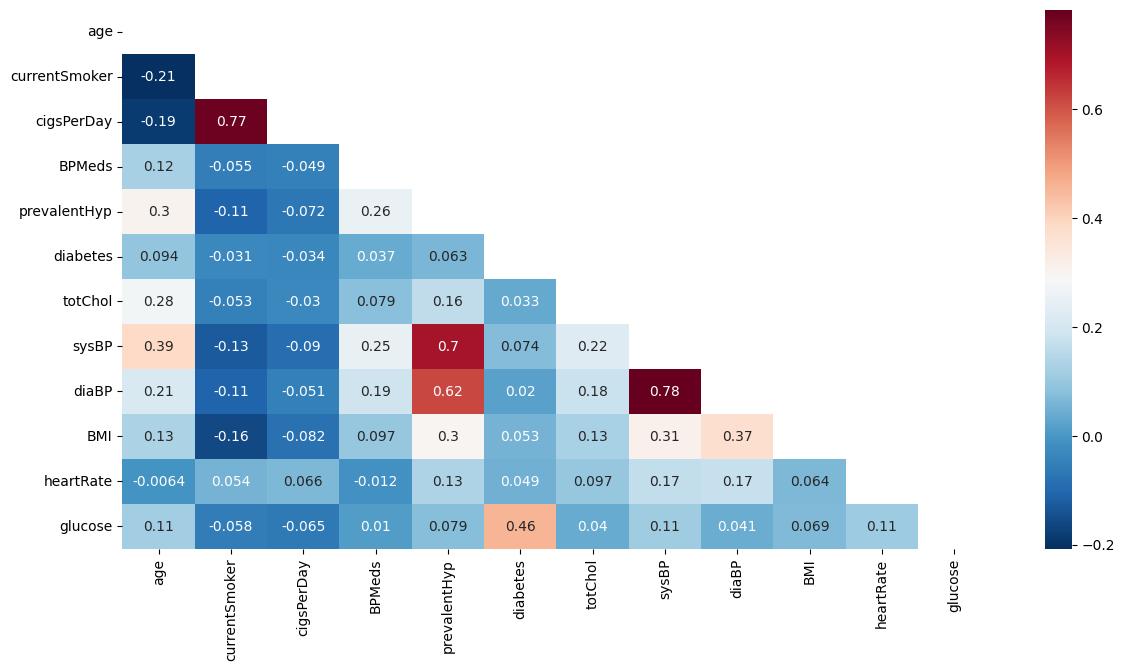

In [366]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(HeartDisease.corr())
sns.heatmap(HeartDisease.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

Del HeatMap se pueden identificar 5 correlaciones fuertes entre pares de variables: currentSmoker con cigsPerDay, prevalentHyp con diaBP y sysBP, diabetes con glucose y, finalmente entre sysBP con diaBP.

currentSmoker y cigsPerDay (0.77): tiene sentido porque los fumadores tienden a consumir más cigarrillos.

prevalentHyp con diaBP (0.62) y con sysBP(0.7): esto es esperable porque la hipertensión es una de las causas de aumento de la hipertensión arterial.

diabetes con glucose (0.62): la diabetes se caracteriza por el aumento de los niveles de glucemia, por lo que tiene sentido.

sysBP con diaBP (0.78): la presión arterial sistólica y diastólica son medidas relacionadas de la presión arterial, por lo tanto es normal que esten relacionadas.

# Paso 2: Estandarización de los datos

In [367]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
num_cols = ['age', 'currentSmoker',	'cigsPerDay', 'BPMeds', 'prevalentHyp',	'diabetes',	'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
num_var = HeartDisease[num_cols]
# Estandarización - Escalado
Estandarizar = StandardScaler()                          # Se instancia el objeto StandardScaler o MinMaxScaler
MEstandarizada = Estandarizar.fit_transform(num_var)    # Se calculan la media y desviación para cada variable, y se escalan los datos

In [368]:
pd.DataFrame(MEstandarizada, columns=num_var.columns)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.228875,-0.981400,-0.758688,-0.169784,-0.662218,-0.142469,-0.964084,-1.213289,-1.085886,0.316483,0.441185,-0.209140
1,-0.410837,-0.981400,-0.758688,-0.169784,-0.662218,-0.142469,0.314459,-0.508063,-0.143977,0.764572,1.796410,-0.271347
2,-0.177111,1.018952,0.919969,-0.169784,-0.662218,-0.142469,0.198228,-0.202465,-0.229605,-0.098508,-0.010556,-0.644589
3,1.342103,1.018952,1.759297,-0.169784,1.510076,-0.142469,-0.266697,0.855374,1.054816,0.726382,-0.914040,1.408241
4,-0.410837,1.018952,1.171767,-0.169784,-0.662218,-0.142469,1.128078,-0.084927,0.112907,-0.668803,0.892927,0.288516
...,...,...,...,...,...,...,...,...,...,...,...,...
3564,0.991515,-0.981400,-0.758688,-0.169784,1.510076,-0.142469,-1.150054,0.432238,-0.143977,-0.195255,0.441185,0.039688
3565,2.160142,-0.981400,-0.758688,-0.169784,1.510076,-0.142469,-1.405763,1.701645,1.226072,-0.658619,-1.365781,-0.084726
3566,0.056614,1.018952,-0.674755,-0.169784,1.510076,-0.142469,1.778973,2.218811,0.797932,0.061887,-0.823691,0.350722
3567,0.173477,1.018952,2.850424,-0.169784,-0.662218,-0.142469,-0.685129,-0.249480,-0.229605,-1.531883,-0.914040,-0.769003


#### **Pasos 3 y 4:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores).

In [369]:
pca = PCA(n_components=12)     #Se instancia el objeto PCA    #pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(MEstandarizada)        #Se obtiene los componentes
print(pca.components_)

[[ 2.97675455e-01 -1.97857539e-01 -1.64772978e-01  2.00105674e-01
   4.46114840e-01  9.51011391e-02  2.03402968e-01  4.92693582e-01
   4.51647564e-01  2.84850743e-01  1.17645093e-01  1.17902741e-01]
 [-1.30273319e-01  6.37174698e-01  6.54574886e-01  4.71729055e-02
   1.61523777e-01 -6.70207999e-02  3.92602758e-02  1.62568187e-01
   1.99162325e-01  1.76497319e-02  2.03533774e-01 -7.99315773e-02]
 [ 4.62471161e-02  1.02154080e-01  8.64269897e-02 -7.89593851e-02
  -7.60623574e-02  6.76401408e-01  2.41482926e-02 -6.26238755e-02
  -1.25880322e-01 -3.91738659e-02  1.71295822e-01  6.77635297e-01]
 [ 5.41962988e-01  1.32897311e-01  1.15211930e-01  1.53117663e-01
  -9.15562164e-02 -1.36767096e-02  6.65080553e-01 -5.47414466e-02
  -2.17478346e-01 -2.59954541e-01 -2.81209628e-01 -6.36019449e-02]
 [-3.53396786e-02  9.08261938e-02  7.27197850e-02  6.02450562e-01
   1.16816276e-01  1.82289041e-01 -4.05379931e-01  4.25772859e-02
  -7.86536606e-03 -5.72030398e-02 -6.34745246e-01  5.48655900e-02]
 [-9.

#### **Paso 5:** Se decide el número de componentes principales
* Se calcula el porcentaje de relevancia, 

1.   Elemento de la lista
2.   Elemento de la lista

es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [370]:
Varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:8]))   
#Con 6 componentes se tiene el 75% de varianza acumulada, con 7 el 83%, con 8 del 89%

Porporción de varianza: [0.26035036 0.14656793 0.12036591 0.08605499 0.08383958 0.07253541
 0.06728229 0.0530573  0.04465586 0.03177624 0.01856327 0.01495086]
Varianza acumulada: 0.8900537652430308


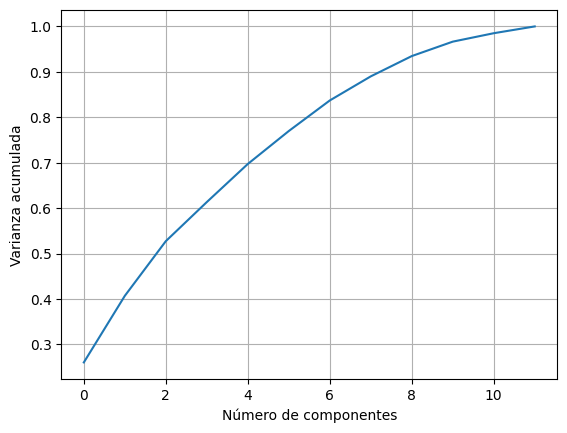

In [371]:
# Se grafica la varianza acumulada en los componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–
La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [372]:
print(pd.DataFrame(abs(pca.components_))) 

          0         1         2         3         4         5         6   \
0   0.297675  0.197858  0.164773  0.200106  0.446115  0.095101  0.203403   
1   0.130273  0.637175  0.654575  0.047173  0.161524  0.067021  0.039260   
2   0.046247  0.102154  0.086427  0.078959  0.076062  0.676401  0.024148   
3   0.541963  0.132897  0.115212  0.153118  0.091556  0.013677  0.665081   
4   0.035340  0.090826  0.072720  0.602451  0.116816  0.182289  0.405380   
5   0.094932  0.076946  0.134749  0.600573  0.008686  0.063048  0.007361   
6   0.322131  0.034576  0.024373  0.426880  0.213896  0.033116  0.371318   
7   0.666475  0.070688  0.101922  0.108220  0.093651  0.151637  0.453902   
8   0.070125  0.023970  0.005574  0.047189  0.014298  0.683260  0.044094   
9   0.104889  0.012914  0.028952  0.083400  0.816570  0.024258  0.062483   
10  0.009855  0.706340  0.694631  0.009969  0.040099  0.001344  0.005369   
11  0.155952  0.082116  0.076346  0.034619  0.154538  0.005334  0.001267   

          7

In [373]:
CargasComponentes = pd.DataFrame(pca.components_, columns=num_var.columns)
CargasComponentes

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.297675,-0.197858,-0.164773,0.200106,0.446115,0.095101,0.203403,0.492694,0.451648,0.284851,0.117645,0.117903
1,-0.130273,0.637175,0.654575,0.047173,0.161524,-0.067021,0.039260,0.162568,0.199162,0.017650,0.203534,-0.079932
2,0.046247,0.102154,0.086427,-0.078959,-0.076062,0.676401,0.024148,-0.062624,-0.125880,-0.039174,0.171296,0.677635
3,0.541963,0.132897,0.115212,0.153118,-0.091556,-0.013677,0.665081,-0.054741,-0.217478,-0.259955,-0.281210,-0.063602
4,-0.035340,0.090826,0.072720,0.602451,0.116816,0.182289,-0.405380,0.042577,-0.007865,-0.057203,-0.634745,0.054866
5,-0.094932,-0.076946,-0.134749,0.600573,0.008686,-0.063048,-0.007361,-0.012811,-0.090207,-0.505882,0.580771,-0.024581
6,-0.322131,-0.034576,0.024373,0.426880,-0.213896,0.033116,0.371318,-0.240738,-0.120216,0.669831,0.077037,-0.021799
7,0.666475,0.070688,0.101922,0.108220,-0.093651,-0.151637,-0.453902,-0.112040,-0.265633,0.360378,0.279031,-0.008908
8,0.070125,-0.023970,-0.005574,-0.047189,0.014298,0.683260,-0.044094,-0.020432,-0.004585,0.013931,0.109923,-0.714522
9,0.104889,-0.012914,0.028952,0.083400,-0.816570,0.024258,-0.062483,0.245799,0.496368,-0.052707,-0.013326,0.002414


In [374]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=num_var.columns)
CargasComponentes

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.297675,0.197858,0.164773,0.200106,0.446115,0.095101,0.203403,0.492694,0.451648,0.284851,0.117645,0.117903
1,0.130273,0.637175,0.654575,0.047173,0.161524,0.067021,0.039260,0.162568,0.199162,0.017650,0.203534,0.079932
2,0.046247,0.102154,0.086427,0.078959,0.076062,0.676401,0.024148,0.062624,0.125880,0.039174,0.171296,0.677635
3,0.541963,0.132897,0.115212,0.153118,0.091556,0.013677,0.665081,0.054741,0.217478,0.259955,0.281210,0.063602
4,0.035340,0.090826,0.072720,0.602451,0.116816,0.182289,0.405380,0.042577,0.007865,0.057203,0.634745,0.054866
5,0.094932,0.076946,0.134749,0.600573,0.008686,0.063048,0.007361,0.012811,0.090207,0.505882,0.580771,0.024581
6,0.322131,0.034576,0.024373,0.426880,0.213896,0.033116,0.371318,0.240738,0.120216,0.669831,0.077037,0.021799
7,0.666475,0.070688,0.101922,0.108220,0.093651,0.151637,0.453902,0.112040,0.265633,0.360378,0.279031,0.008908
8,0.070125,0.023970,0.005574,0.047189,0.014298,0.683260,0.044094,0.020432,0.004585,0.013931,0.109923,0.714522
9,0.104889,0.012914,0.028952,0.083400,0.816570,0.024258,0.062483,0.245799,0.496368,0.052707,0.013326,0.002414


En este punto, se estableció un umbral del 50% para descartar variables que no superen dicho valor. Se identificaron tres variables ('prevalenHyp', 'sysBP' y 'diaBP') que cumplen con esta condición, pero están relacionadas con la hipertensión arterial, la cual es importante para detectar enfermedades cardiovasculares. Como el objetivo de este análisis exploratorio de datos es identificar información relevante para predecir enfermedades del corazón, se decidió mantener solo la variable de presión sistólica ('sysBP')debido a su mayor importancia y eliminar las otras dos variables.

Además, se identificaron dos variables fuertemente correlacionadas ('currentSmoker' y 'cigsPerDay') que superan el umbral del 50%. Aunque ambas pueden ser importantes para el modelo, es probable que proporcionen información redundante. Por lo tanto, se decidió conservar solo la variable de mayor importancia ('cigsPerDay') y eliminar 'currentSmoker'.

In [375]:
HeartDiseaseACP = HeartDisease.drop(columns=['prevalentHyp', 'diaBP', 'currentSmoker'])
HeartDiseaseACP

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0.0,0.0,no,0,195.0,106.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0.0,0.0,no,0,250.0,121.0,28.73,95.0,76.0,No
2,Male,48,uneducated,20.0,0.0,no,0,245.0,127.5,25.34,75.0,70.0,No
3,Female,61,graduate,30.0,0.0,no,0,225.0,150.0,28.58,65.0,103.0,yes
4,Female,46,graduate,23.0,0.0,no,0,285.0,130.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,Male,58,graduate,0.0,0.0,no,0,187.0,141.0,24.96,80.0,81.0,No
4232,Male,68,uneducated,0.0,0.0,no,0,176.0,168.0,23.14,60.0,79.0,yes
4233,Male,50,uneducated,1.0,0.0,no,0,313.0,179.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,43.0,0.0,no,0,207.0,126.5,19.71,65.0,68.0,No


C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1572110062.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MatrizInf = np.triu(HeartDiseaseACP.corr())
C:\Users\Leona\AppData\Local\Temp\ipykernel_15340\1572110062.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HeartDiseaseACP.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)


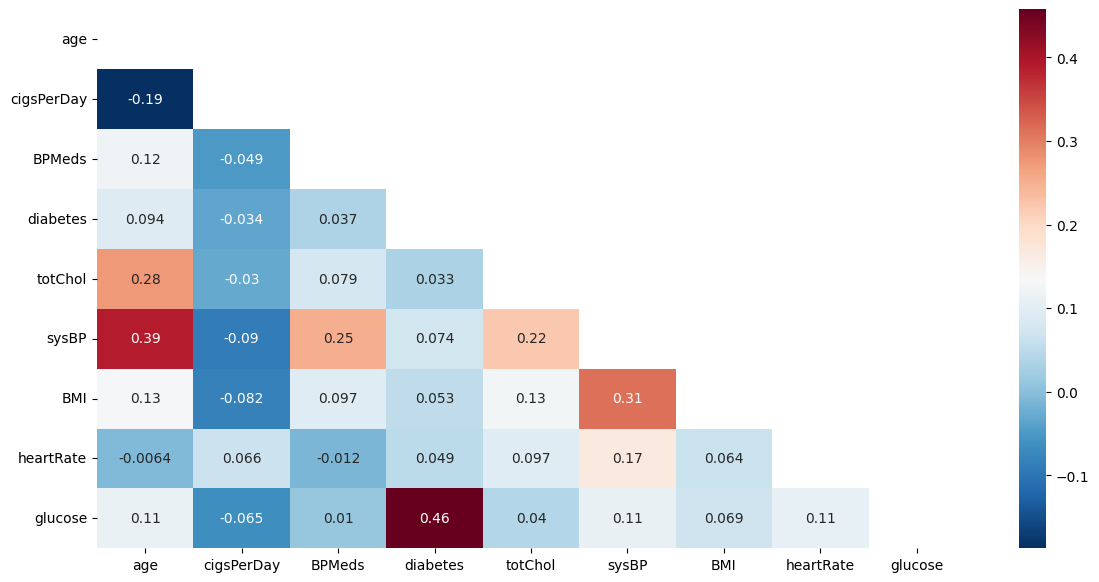

In [376]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(HeartDiseaseACP.corr())
sns.heatmap(HeartDiseaseACP.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [378]:
HeartDiseaseACP.describe()

,age,cigsPerDay,BPMeds,diabetes,totChol,sysBP,BMI,heartRate,glucose
count,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000
mean,49.515551,9.039227,0.028019,0.019894,236.472681,131.806388,25.726921,75.116839,80.362006
std,8.558251,11.915958,0.165050,0.139654,43.023724,21.272760,3.928344,11.069824,16.077624
min,32.000000,0.000000,0.000000,0.000000,113.000000,83.500000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,206.000000,116.500000,23.080000,67.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,234.000000,128.000000,25.360000,75.000000,78.000000
75%,56.000000,20.000000,0.000000,0.000000,263.000000,143.000000,27.970000,82.000000,86.000000
max,70.000000,70.000000,1.000000,1.000000,410.000000,220.000000,45.800000,108.000000,216.000000
